In [2]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dbConnect = {
    'host': 'localhost',
    'user': 'root',
    'password': '',
    'database': 'WSN'
}

conexion = mysql.connector.connect(**dbConnect)
cursor = conexion.cursor()


In [4]:
sql = 'select * from medidas'
cursor.execute(sql)
WSN = pd.DataFrame.from_records(cursor.fetchall(),
                                       columns = [desc[0] for desc in cursor.description])

In [5]:
WSN

,IDMEDIDA,NODO,TEMPERATURA,HUMEDAD RELATIVA,HUMEDAD DE LA TIERRA,NIVEL UV,INTENSIDAD LUMÍNICA,AÑO,MES,DIA,HORA,MINUTO,TIME
0,1,2,27,19,"74,97",0,5853,2018,5,9,9,38,2018-05-09 09:38:00
1,2,2,28,19,"72,72",0,5865,2018,5,9,9,49,2018-05-09 09:49:00
2,3,2,28,19,"72,56",0,5859,2018,5,9,9,50,2018-05-09 09:50:00
3,4,2,28,19,"72,4",0,5859,2018,5,9,9,51,2018-05-09 09:51:00
4,5,2,28,19,"72,08",0,5859,2018,5,9,9,52,2018-05-09 09:52:00
5,6,2,28,19,"71,92",0,5865,2018,5,9,9,53,2018-05-09 09:53:00
6,7,2,28,19,"71,76",0,5859,2018,5,9,9,54,2018-05-09 09:54:00
7,8,2,28,19,"71,6",0,5859,2018,5,9,9,55,2018-05-09 09:55:00
8,9,2,28,19,"71,44",0,5859,2018,5,9,9,56,2018-05-09 09:56:00
9,10,2,28,19,"72,72",0,5859,2018,5,9,9,57,2018-05-09 09:57:00


TIME=[]
for fila in range(len(WSN)):
    TIME.append(pd.Timestamp(WSN.AÑO[fila],WSN.MES[fila],WSN.DIA[fila],WSN.HORA[fila],WSN.MINUTO[fila]))
WSN['TIME']=TIME

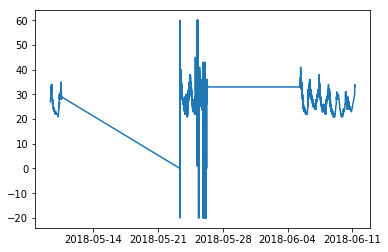

In [7]:
plt.plot(WSN.TIME,WSN.TEMPERATURA)

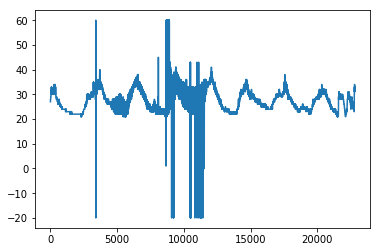

In [8]:
plt.plot(WSN.TEMPERATURA)

for f in range(len(WSN)):
    sql = 'update medidas set TIME = %s where IDMEDIDA = %s'
    cursor.execute(sql,(str(WSN.TIME[f]),f+1,))
    resultados = cursor.fetchone()
conexion.commit()
cursor.close()
conexion.close()